Part 1

In [47]:
import sklearn

In [48]:
import matplotlib.pyplot as plt

In [49]:
import pandas as pd 

In [50]:
import geopy as gp

In [51]:
df=pd.read_csv("Mobileye_risk_TelAviv_New.csv")

In [52]:
df.describe()

,start_lat,start_long,end_lat,end_long,detection_drives_count,avg_speed,near_miss_pedestrian_ratio,near_miss_bicycle_ratio,near_miss_vehicle_ratio,avg_pedestrian_on_road_volume,avg_bicycle_on_road_volume,braking_count,cornering_count,harsh_braking_ratio,harsh_cornering_ratio
count,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000
mean,32.065733,34.775065,32.065730,34.775070,557.363048,34.631136,0.004319,0.000930,0.008162,0.050953,0.026391,66.247788,276.613857,0.000002,0.015083
std,0.019065,0.010403,0.019061,0.010399,1303.459900,13.204298,0.015200,0.004901,0.017387,0.074877,0.043735,138.458602,614.604640,0.000135,0.037954
min,32.029168,34.742794,32.029091,34.742794,50.000000,9.923498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.050809,34.769196,32.050817,34.769217,93.000000,25.997728,0.000000,0.000000,0.000000,0.001731,0.000000,5.000000,38.000000,0.000000,0.000000
50%,32.064847,34.776714,32.064841,34.776717,188.000000,31.902938,0.000000,0.000000,0.000000,0.020090,0.010441,22.000000,87.000000,0.000000,0.001331
75%,32.078517,34.783262,32.078487,34.783254,481.000000,39.849982,0.000000,0.000000,0.009326,0.067423,0.033782,68.000000,265.000000,0.000000,0.011058
max,32.129996,34.791792,32.129996,34.791854,25047.000000,90.656510,0.476190,0.157895,0.235294,0.780000,0.716418,2715.000000,7130.000000,0.012346,0.636364


Part 2

In [53]:
from geopy.distance import geodesic

def distance(row):
    address1 = (row['start_lat'], row['start_long'])
    address2 = (row['end_lat'], row['end_long'])
    return (geodesic(address1, address2).m) #in meters

df["section_length"] = df.apply(lambda row: distance(row), axis=1)

In [54]:
df["section_length"].describe()

count    9266.000000
mean       42.657029
std        44.375733
min         0.671996
25%        11.204812
50%        26.910230
75%        62.054658
max       449.794289
Name: section_length, dtype: float64

In [55]:
def avgTime(row):
    speed = row['avg_speed']
    length = row['section_length']
    return (length/(speed*1000))*3600

df["avg_time"] =df.apply(lambda row: avgTime(row), axis=1)

In [56]:
newDF = df.drop(['start_lat','start_long','end_lat','end_long'],axis=1)

In [57]:
newDF.describe()

,detection_drives_count,avg_speed,near_miss_pedestrian_ratio,near_miss_bicycle_ratio,near_miss_vehicle_ratio,avg_pedestrian_on_road_volume,avg_bicycle_on_road_volume,braking_count,cornering_count,harsh_braking_ratio,harsh_cornering_ratio,section_length,avg_time
count,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000
mean,557.363048,34.631136,0.004319,0.000930,0.008162,0.050953,0.026391,66.247788,276.613857,0.000002,0.015083,42.657029,5.215875
std,1303.459900,13.204298,0.015200,0.004901,0.017387,0.074877,0.043735,138.458602,614.604640,0.000135,0.037954,44.375733,6.076197
min,50.000000,9.923498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.671996,0.087508
25%,93.000000,25.997728,0.000000,0.000000,0.000000,0.001731,0.000000,5.000000,38.000000,0.000000,0.000000,11.204812,1.160741
50%,188.000000,31.902938,0.000000,0.000000,0.000000,0.020090,0.010441,22.000000,87.000000,0.000000,0.001331,26.910230,2.649629
75%,481.000000,39.849982,0.000000,0.000000,0.009326,0.067423,0.033782,68.000000,265.000000,0.000000,0.011058,62.054658,7.536841
max,25047.000000,90.656510,0.476190,0.157895,0.235294,0.780000,0.716418,2715.000000,7130.000000,0.012346,0.636364,449.794289,61.594813


In [58]:
from sklearn.preprocessing import MinMaxScaler
column_to_normalize = ['detection_drives_count', 'avg_speed', 'braking_count', 'cornering_count','section_length', 'avg_time']
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(newDF[column_to_normalize])
X_normalize = pd.DataFrame(x_scaled, columns=column_to_normalize, index=newDF.index)
pd.DataFrame(X_normalize)

,detection_drives_count,avg_speed,braking_count,cornering_count,section_length,avg_time
0,0.009921,0.249457,0.007735,0.025666,0.020792,0.018066
1,0.003040,0.201741,0.000000,0.000000,0.052166,0.052396
2,0.021243,0.279347,0.022099,0.054558,0.020043,0.016012
3,0.009761,0.300635,0.010681,0.028191,0.020967,0.015846
4,0.001000,0.259325,0.004052,0.006732,0.157735,0.134214
...,...,...,...,...,...,...
9261,0.002240,0.230451,0.000000,0.000000,0.137091,0.126275
9262,0.000440,0.090072,0.000000,0.000000,0.117271,0.180140
9263,0.000560,0.240742,0.000737,0.003647,0.014563,0.012956
9264,0.252190,0.763426,0.011418,0.031417,0.111715,0.040166


Part 3

In [59]:
from sklearn.cluster import KMeans


In [60]:
def create_kmeans_classifier(k):
    if (k<2):
        return
    else:
        kmeans = KMeans(n_clusters=k)
        return kmeans

In [66]:
from sklearn.metrics import silhouette_score

sseNormalized = []
sseUnNormalized = []
silhouetteNormalized = []
silhouetteUnNormalized = []

kRange = range(2,16)
for k in kRange:
    kmeansClassifier = create_kmeans_classifier(k)
    
    kmeansClassifier.fit(newDF)
    sseNormalized.append(kmeansClassifier.inertia_) 
    silhouetteNormalized.append(silhouette_score(newDF,kmeansClassifier.predict(newDF)))
    
    kmeansClassifier.fit(X_normalize)
    sseUnNormalized.append(kmeansClassifier.inertia_) 
    silhouetteUnNormalized.append(silhouette_score(X_normalize,kmeansClassifier.predict(X_normalize)))
    
print("UnNormilized Silhouette length: " + str(len(silhouetteUnNormalized)))
print("Normilized Silhouette length: " + str(len(silhouetteNormalized)))


UnNormilized Silhouette length: 14
Normilized Silhouette length: 14


Part 4

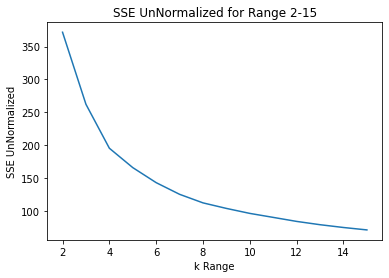

In [68]:
plt.plot(kRange, sseUnNormalized)
plt.xlabel("k Range")
plt.ylabel("SSE UnNormalized")
plt.title("SSE UnNormalized for Range 2-15")
plt.show()

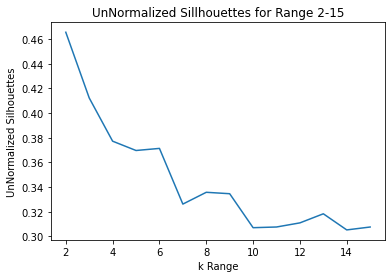

In [69]:
plt.plot(k_range, silhouetteUnNormalized)
plt.xlabel("k Range")
plt.ylabel("UnNormalized Silhouettes")
plt.title("UnNormalized Sillhouettes for Range 2-15")
plt.show()

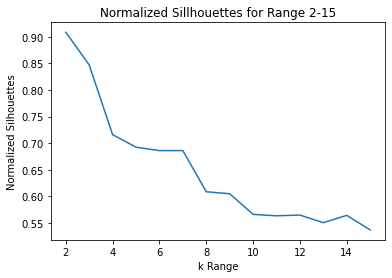

In [70]:
plt.plot(k_range, silhouetteNormalized)
plt.xlabel("k Range")
plt.ylabel("Normalized Silhouettes")
plt.title("Normalized Sillhouettes for Range 2-15")
plt.show()